<a href="https://colab.research.google.com/github/hida0/ESAA/blob/HW/Week16_HW2_%EA%B5%B0%EC%A7%91%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 개념 정리 & 필사
(파이썬 머신러닝 완벽가이드 ch7. 1-5 pg. 409-451)

### 1. K-평균 알고리즘
- K-평균은 군집화에서 가장 일반적으로 사용되는 알고리즘으로, **군집 중심점**(centroid)이라는 **특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 데이터들을 선택**하는 군집화 기법이다.
- 군집 중심점은 선택된 데이터들의 평균 지점으로 이동하게 되며, 이동된 중심점에서 다시 가까운 데이터들을 선택하고 다시 중심점을 평균 지점으로 이동하는 프로세스를 반복적으로 수행한다.
- 모든 데이터 포인트에서 더이상 중심점의 이동이 없을 경우에 반복을 멈추고 해당 중심점에 속하는 데이터 포인트들을 군집화하는 기법이다.
- 알고리즘이 쉽고 간결하여 일반적으로 군집화에서 가장 많이 활용된다는 장점이 있다.
- 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어지며, 반복을 수행하는 횟수가 많을수록 수행 히간이 매우 느려진다는 단점이 있다. 몇 개의 군집을 선택해야 할지 가이드하기 어렵다.

### 1-1. 사이킷런 KMeans 클래스 소개
- 사이킷런 패키지는 K-평균을 구현하기 위해 KMeans 클래스를 제공한다. 
- 사이킷런의 **`cluster`**로부터 **`KMeans`**를 임포트하여 사용한다.
- KMeans 클래스는 n_clusters, init, n_init, max_iter 등 다음과 같은 초기화 파라미터를 가지고 있다. 이들 중 주요 파라미터는 다음과 같다
 - **`n_clusters`** : 가장 중요한 파라미터이며, 군집화할 개수 즉 군집 중심점의 개수를 의미한다.
 - **`init`**: 초기에 군집 중심점의 좌표를 설정할 방식을 말하며, 보통은 임의로 중심을 설정하지 않고 일반적으로 k-means++ 방식으로 최초 설정한다.
 - **`max_iter`** : 최대 반복 횟수이며, 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료한다.

- K-Means는 사이킷런의 비지도학습 클래스와 마찬가지로 **`fit( )`** 또는 **`fit_transform( )`** 메서드를 이용하여 수행한다.
- 이렇게 수행된 KMeans 객체는 군집화 수행이 완료되어 군집화와 관련된 주요 속성을 알 수 있다. 주요 속성 정보는 다음과 같다.
 - **`labels_`** : 각 데이터 포인트가 속한 군집 중심점 레이블이다.
 - **`cluster_centers_`** : 각 군집의 중심점 좌표로, 이를 이용하면 군집 중심점 좌표가 어디인지 시각화 할 수 있다.

### 1-2. K-평균을 이용한 붓꽃 데이터 세트 군집화
- 붓꽃 데이터 세트를 이용하여 꽃받침, 꽃잎의 길이에 따라 각 데이터의 군집화가 어떻게 결정되는지 확인해보고, 이를 분류값과 비교한다.
- 사이킷런의 `load_iris( )`를 이용해 붓꽃 데이터를 추출하고, 편리한 데이터 핸들링을 위해 DataFrame으로 변경한다.
- 붓꽃 데이터 세트를 **3개 그룹으로 군집화**하기 위해 **n_clusters=3**, 초기 중심 설정 방식인 **init는 디폴트 값인 k-means++**, 최대 반복 횟수 역시 디폴트 값인 **max_iter=300**으로 설정한 KMeans 객체를 만든다.
- **`fit( )`**을 수행하여 irisDF 데이터에 대한 군집화 수행 결과를 kmeans 객체 변수로 반환한다.
- kmeans의 **`labels_`** 속성값을 확인해보면 irisDF의 각 데이터가 어떤 중심에 속하는지를 알 수 있다.
- labels_의 값이 0, 1, 2로 되어 있으며, 이는 각각의 레코드가 첫번째 군집, 두번째 군집, 세번째 군집에 속함을 의미한다.

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length' , 'sepal_width', 'petal_length' , 'petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [ ]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


### 1-2. K-평균을 이용한 붓꽃 데이터 세트 군집화
- 실제 붓꽃 품종 분류 값과 얼마나 차이가 나는지를 통해 군집화가 효과적으로 되었는지 확인한다.
- 붓꽃 데이터 세트의 target 값을 'target' 칼럼으로, 앞에서 구한 labels_ 값을 'cluster' 칼럼으로 지정하여 irisDF DataFrame에 추가한다.
- 그 다음 **`group by`** 연산을 실제 분류값인 target과 군집화 분류값인 cluster 레벨로 적용하여, target과 cluster 값 개수를 비교한다.
- target 0인 데이터는 cluster 1로 모두 잘 그루핑되었다. target 1인 데이터는 2개만 cluster 2로 그루핑되고 나머지 48개는 모두 cluster 0으로 그루핑되었다. target 2인 데이터는 cluster 0에 14개, cluster 2에 36개로 분산되어 그루핑되었다.

In [ ]:
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
iris_result = irisDF.groupby(['target', 'cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


### 1-2. K-평균을 이용한 붓꽃 데이터 세트 군집화
- 붓꽃 데이터 세트에 대해 2차원 평면상에 개별 데이터의 군집화를 시각화한다.
- 붓꽃 데이터 세트의 속성은 4개이므로 2차원 평면에 적합하지 않으므로 **PCA를 이용해 4개의 속성을 2개로 차원 축소**한다.
- 2개의 주성분을 각각 X 좌표을 나타내는 'pca_x', Y 좌표를 나타내는 'pca_y'로 개별 데이터를 표현하여 irisDF의 칼럼을 생성한다.
- 각 군집별로 cluster 0은 마커 동그라미 'o', cluster 1은 마커 네모 's', cluster 2는 마커 세모 '^'로 표현한다. 맷플롯립의 산점도는 서로 다른 마커를 한번에 표현할 수 없으므로 마커별로 별도의 산점도를 수행한다.
---
- cluster 1을 나타내는 네모 's'는 다른 군집과 명확히 잘 분리되어 있다.
- cluster 0을 나타내는 동그라미 'o'와 cluster 2를 나타내는 '^'는 상당 수준 분리되어 있지만, 네모만큼은 명확하게 분리되어 있지 않음을 알 수 있다.


In [ ]:
from sklearn.decomposition import PCA

# 4개의 속성을 2개로 차원 축소
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:, 0]
irisDF['pca_y'] = pca_transformed[:, 1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


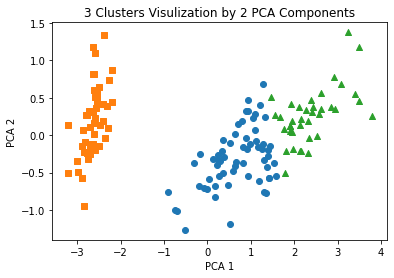

In [ ]:
# 군집 값이 0, 1, 2인 경우마다 별도의 인덱스를 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

import matplotlib.pyplot as plt
%matplotlib inline

# 군집 값 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값을 추출하여 각각 마커 o, s, ^로 표시
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("3 Clusters Visulization by 2 PCA Components")
plt.show()

### 1-3. 군집화 알고리즘 테스트를 위한 데이터 생성
- 사이킷런은 다양한 유형의 군집화 알고리즘을 테스트 해보기 위한 간단한 데이터 생성기를 제공하며, 대표적인 군집화용 데이터 생성기로는 **`make_blobs( )`**와 **`make_classification( )`** API가 있다.
- 두 API는 비슷하게 **여러 개의 클래스에 해당하는 데이터 세트**를 만드는데, 하나의 클래스에 여러 개의 군집이 분포될 수 있게 데이터를 생성할 수 있다.
- 둘 중 어떤 것을 사용하든 큰 차이는 없지만 make_blobs( )는 개별 군집의 중심점과 표준 편차 제어 기능이 추가되어 있으며, make_classification( )은 노이즈를 포함한 데이터를 만드는데 유용하게 사용할 수 있다.
- 둘 다 분류 용도로도 테스트 데이터 생성이 가능하다.
- 이 외에 `make_circle( )`, `make_moon( )` API는 중심 기반의 군집화로 해결하기 어려운 데이터 세트를 만드는데 사용된다.
---
- 사이킷런의 **`datasets`**로부터 **`make_blobs( )`**를 임포트하여 간략한 사용법을 알아보면서 군집화를 위한 테스트 데이터 세트를 만드는 방법을 살펴본다.
- **`make_blobs( )`**를 호출하면 **피처 데이터 세트와 타겟 데이터 세트가 튜플**(Tuple)**로 반환**된다.
- **`make_blobs( )`**의 호출 파라미터는 다음과 같다.
 - **`n_samples`** : 생성할 **총 데이터의 개수**로, 디폴트는 100개이다.
 - **`n_features`** : 데이터의 **피처 개수**로, 시각화를 목표로 할 경우 2개로 설정하여 보통 첫번째 피처는 x 좌표, 두번째 피처는 y 좌표상에 표현한다.
 - **`centers`** : int 값으로 설정하면 **군집의 개수**를 나타낸다. 그렇지 않고 ndarray 형태로 표현할 경우 **개별 군집 중심점의 좌표**를 의미한다.
 - **`cluster_std`** : 생성될 군집 데이터의 **표준 편차**이다. float 값으로 설정하면 군집 내에서 데이터가 해당 표준 편차 값을 가진 값으로 만들어지며, list 값으로 설정하면 각 군집별로 서로 다른 표준 편차를 가진 데이터 세트를 만든다. 해당 값이 작을수록 군집 중심에 데이터가 모여 있으며, 클수록 데이터가 퍼져 있음을 알 수 있다.

- 예를 들어 `X, y = make_blobs(n_samples=200, n_features=2, centers=3, random_state=0)`을 호출하면 총 200개의 레코드와 2개의 피처가 3개의 군집화 기반 분포도를 가진 피처 데이터 세트 X와 동시에 3개의 군집화 값을 가진 타겟 데이터 세트 y가 반환된다.


In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 각 값과 해당하는 개수의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


### 1-3. 군집화 알고리즘 테스트를 위한 데이터 생성
- 피처 데이터 세트 X는 200개의 레코드와 2개의 피처를 가지므로 shape는 (200, 2), 군집 타겟 데이터 세트인 y의 shape은 (200, ), 그리고 3개의 cluster 값은 [0, 1, 2]이며 각각 [67, 67, 66]개로 균일하게 구성되어 있다.
- 데이터 가공을 편리하게 하기 위해 위 데이터 세트를 DataFrame으로 변환한다. 피처의 이름은 ftr1, ftr2이다.
---
- 이제 **`make_blobs( )`**로 만든 이 피처 데이터 세트가 어떤 군집화 분포를 가지고 만들어졌는지 확인하기 위해 시각화한다.
- 타겟 값 0, 1, 2에 따라 마커를 다르게 하여 산점도를 그려보면 다음과 같이 3개의 구분될 수 있는 군집 영역으로 피처 데이터 세트가 만들어졌음을 알 수 있다.

In [ ]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


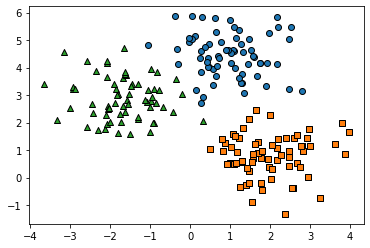

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# 각 타겟별 산점도의 마커 값
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

# 3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0, 1, 2]
target_list = np.unique(y)

# target==0, target==1, target==2로 scatter plot 을 marker 별로 생성
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target])
    
plt.show()

### 1-3. 군집화 알고리즘 테스트를 위한 데이터 생성
- 이번에는 이렇게 만들어진 데이터 세트에 KMeans 군집화를 수행한 뒤에 군집별로 시각화한다.
- 먼저 KMeans 객체에 **`fit_predict(X)`**를 수행하여 **`make_blobs( )`**의 피처 데이터 세트인 X 데이터를 군집화하고, 이를 clusterDF의 'kmeans_label' 칼럼으로 저장한다.
- KMeans 객체의 **`cluster_centers_`** 속성은 **개별 군집의 중심 위치 좌표**를 나타내기 위해 사용한다.
---
- **`groupby`** 메서드로 'target'과 'kmeans_label'에 대해 묶어 분포를 확인해보면, target 0이 cluster label 0으로, target 1이 cluster label 2로, target 2가 cluster label 1로 거의 대부분 잘 매핑되었음을 알 수 있다.

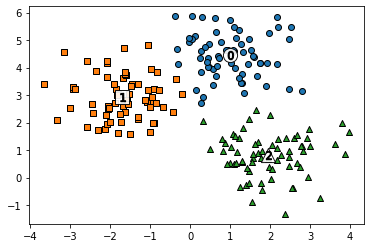

In [ ]:
# KMeans 객체를 이용하여 X 데이터를 K-Means 군집화 수행
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)

# DataFrame clusterDF에 칼럼을 추가
clusterDF['kmeans_label'] = cluster_labels

# cluster_centers_는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)  # array([0, 1, 2], dtype=int32)

# 각 타겟별 산점도의 마커 값
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 그림
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])

    # 군집별 중심 위치 좌표 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', alpha=0.9, edgecolor='k', marker=markers[label]) # 테두리 윤곽
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$'%label) # 군집 번호

plt.show()

In [ ]:
clusterDF.head(3)

,ftr1,ftr2,target,kmeans_label
0,-1.692427,3.622025,2,1
1,0.697940,4.428867,0,0
2,1.100228,4.606317,0,0


In [ ]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
# target 0이 cluster label 0으로, target 1이 cluster label 2로, target 2가 cluster label 1로

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


### 2. 군집 평가(Cluster Estimation)
- 붓꽃 데이터 세트의 경우 데이터의 결과값에 품종을 뜻하는 타겟 레이블이 있었고, 군집화 결과를 이 레이블과 비교하여 군집화가 얼마나 효율적으로 되었는지 짐작할 수 있었다.
- 하지만 대부분의 군집화 데이터 세트는 이렇게 비교할 만한 타겟 레이블을 가지고 있지 않다.
- 비지도학습의 특성상 어떠한 지표라도 군집화가 효율적으로 잘 되었는지 정확하게 성능을 평가하기는 어렵다.
- 그럼에도 불구하고 군집화의 성능을 평가하는 대표적인 방법으로 **실루엣 분석**을 이용한다.

### 2-1. 실루엣 분석(silhouette analysis)의 개요
- **실루엣 분석**은 군집화 평가 방법으로, **각 군집 간의 거리가 얼마나 효율적으로 분리되어 있는지**를 나타낸다.
- 효율적으로 잘 분리됐다는 것은 다른 군집과의 거리는 떨어져 있고, 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐 있다는 의미이다.
- 군집화가 잘 될수록 개별 군집은 비슷한 정도의 여유 공간을 가지고 떨어져 있다.
- 실루엣 분석은 **실루엣 계수**(silhouette coefficient)를 기반으로 하며, 실루엣 계수는 **개별 데이터가 가지는 군집화 지표**이다.
- 개별 데이터가 가지는 실루엣 계수는 해당 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군집화 되어 있고, 다른 군집에 있는 데이터와는 얼마나 멀리 분리되어 있는지를 나타내는 지표이다.
---
- 특정 데이터 포인트의 실루엣 계수 값은 **해당 데이터 포인트과 같은 군집 내에 있는 다른 데이터 포인트와의 거리를 평균한 값 $a(i)$**와 **해당 데이터 포인트가 속하지 않은 군집 중 가장 가까운 군집과의 평균 거리 $b(i)$**를 기반으로 계산된다.
- 두 군집 간의 거리가 얼마나 떨어져 있는가의 값은 $b(i)-a(i)$이며, 이 값을 정규화하기 위해 $max(a(i),b(i))$ 값으로 나눈다.
- 따라서 $i$번째 데이터 포인트의 실루엣 계수 값 $s(i)$는 다음과 같이 정의한다.
$s(i) = \frac{b(i)-a(i)}{max(a(i),b(i))}$
- 실루엣 계수는 **-1에서 1 사이의 값**을 가지며, **1로 가까워질수록 근처의 군집과 더 멀리 떨어져있다**는 것이고, **0에 가까울수록 근처의 군집과 가까워진다**는 것이다. **- 값**은 데이터 포인트가 **아예 다른 군집에 할당됐음**을 의미한다.

### 2-1. 실루엣 분석(silhouette analysis)의 개요
- 사이킷런은 실루엣 분석을 위해 다음과 같은 메서드를 제공한다.
- **`sklearn.metrics.silhouette_samples(X, labels, metric='euclidean', **kwds)`** 
 - 인자로 **X feature 데이터 세트**와 **각 피처 데이터 세트가 속한 군집 레이블 값인 labels 데이터**를 입력해주면  **각 데이터 포인트의 실루엣 계수를 계산하여 반환**한다.
- **`sklearn.metrics.silhouette_score(X, labels, metric='euclidean', sample_size=None, **kwds)`** :
 - 인자로 **X feature 데이터 세트**와 **각 피처 데이터 세트가 속한 군집 레이블 값인 labels 데이터**를 입력해주면 **전체 데이터의 실루엣 계수 값을 평균하여 반환**한다.
 - 즉 **`np.mean(silhouette_samples( ))`**이다.
 - 일반적으로 이 값이 높을수록 군집화가 어느 정도 잘 되었다고 판단할 수 있다.

---
- 좋은 군집화가 되려면 다음 기준 조건을 만족해야 한다.
 1. 전체 실루엣 계수의 평균값, 즉 사이킷런의 **`silhoutte_score( )`** 값은 0~1 사이의 값을 가지며, 1에 가까울수록 좋다.
 2. 하지만 전체 실루엣 계수의 평균값과 더불어 개별 군집의 평균값의 편차가 크지 않아야 한다. 즉, **개별 군집의 실루엣 계수 평균값이 전체 실루엣 계수 평균값에서 크게 벗어나지 않는 것이 중요**하다.

### 2-2. 붓꽃 데이터 세트를 이용한 군집 평가
- 앞의 붓꽃 데이터 세트의 군집화 결과를 실루엣 분석으로 평가한다.
- 이를 위해 **`sklearn.metrics`** 모듈의 **`silhouette_samples( )`**와 **`silhouette_score( )`**를 임포트하여 이용한다.
---
- 평균 실루엣 계수 값이 약 0.553이다.
- 1번 군집의 경우 0.8 이상의 높은 실루엣 계수 값을 나타내는데, 이는 1번 군집이 아닌 다른 군집의 경우 실루엣 계수 값이 평균보다 낮기 때문일 것이다.
- irisDF에 군집 칼럼별로 **`groupby`** 메서드를 이용하여 'silhouette_coeff' 칼럼의 평균 값을 구해 군집별 평균 실루엣 계수 값을 알아본다.
- 1번 군집은 실루엣 계수 평균 값이 약 0.79인데 반해, 0번은 약 0.41, 2번은 약 0.45로 상대적으로 평균값이 1번 군집에 비해 낮다.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisDF)
irisDF['cluster'] = kmeans.labels_

# 실루엣 분석 평가 지표 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score

# iris의 모든 개별 데이터에 실루엣 계수 값을 구함
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print("silhouette_samples( ) return 값의 shape", score_samples.shape)

# irisDF에 실루엣 계수 칼럼을 추가
irisDF['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수 값을 구함
average_score = silhouette_score(iris.data, irisDF['cluster'])
print("붓꽃 데이터 세트 Silhouette Analysis Score: {0:.3f}".format(average_score))

irisDF.head(3)

silhouette_samples( ) return 값의 shape (150,)
붓꽃 데이터 세트 Silhouette Analysis Score: 0.553


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


In [ ]:
# 각 군집별 평균 실루엣 계수
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

### 2-3. 군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법
- 전체 데이터의 평균 실루엣 계수 값이 높다고 해서 반드시 최적의 군집 개수로 군집화가 잘 되었다고 볼 수 없다. 특정 군집 내의 실루엣 계수 값만 너무 높고, 다른 군집은 내부 데이터끼리의 거리가 너무 떨어져 있어 실루엣 계수 값이 낮아져도 평균적으로 높은 값을 가질 수 있기 때문이다.
- **개별 군집별로 적당히 분리된 거리를 유지**하면서도 **군집 내의 데이터가 서로 뭉쳐 있는 경우**에 K-평균의 적절한 군집 개수가 설정되었다고 판단할 수 있다.
- 다음 여러 개의 군집 개수가 주어졌을 때 이를 분석한 도표를 통해 평균 실루엣 계수로 군집 개수를 최적화하는 방법을 알아본다.
---
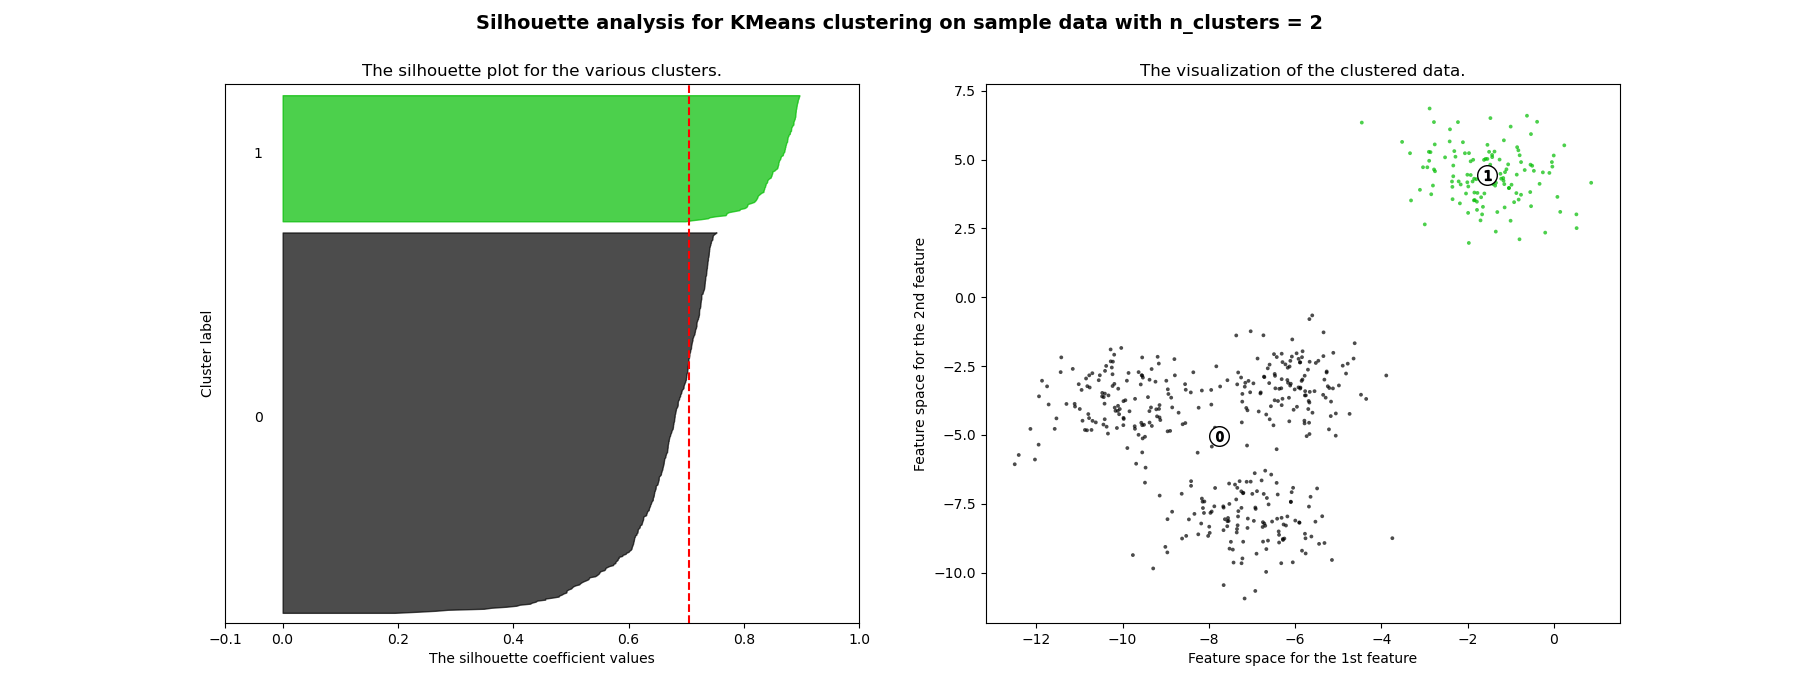

- 첫번째 경우는 다음 그림과 같이 주어진 데이터에 대해서 **군집의 개수를 2개**로 정했을 때이다. 이때 전체 데이터의 평균 실루엣 계수, 즉 silhouette_score는 약 **0.704**로 매우 높게 나타난다.
- 왼쪽 그림은 **개별 군집에 속하는 데이터의 실루엣 계수를 2차원**으로 나타낸 것이다. **X축은 실루엣 계수 값**이고, **Y축은 개별 군집과 이에 속하는 데이터**이다. 개별 군집은 Y축에 숫자 값으로 0, 1로 표시되어 있으며, 해당하는 데이터는 일일이 숫자 값으로 표시되지는 않지만 Y축의 높이로 추측할 수 있다.
- **점선**으로 표시된 선은 **전체 평균 실루엣 계수 값**을 나타낸다.
- 이로부터 판단할 때 1번 군집의 모든 데이터는 평균 실루엣 계수 값 이상이지만, 2번 군집의 경우에는 평균 값보다 작은 데이터 값이 매우 많다.
- 오른쪽 그림은 데이터의 분포를 나타낸 그림으로 1번 군집의 경우는 0번 군집과 멀리 떨어져 있고 내부 데이터끼리도 잘 뭉쳐 있으나, 0번 군집의 경우는 내부 데이터끼리 많이 떨어져 있다.

### 2-3. 군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법
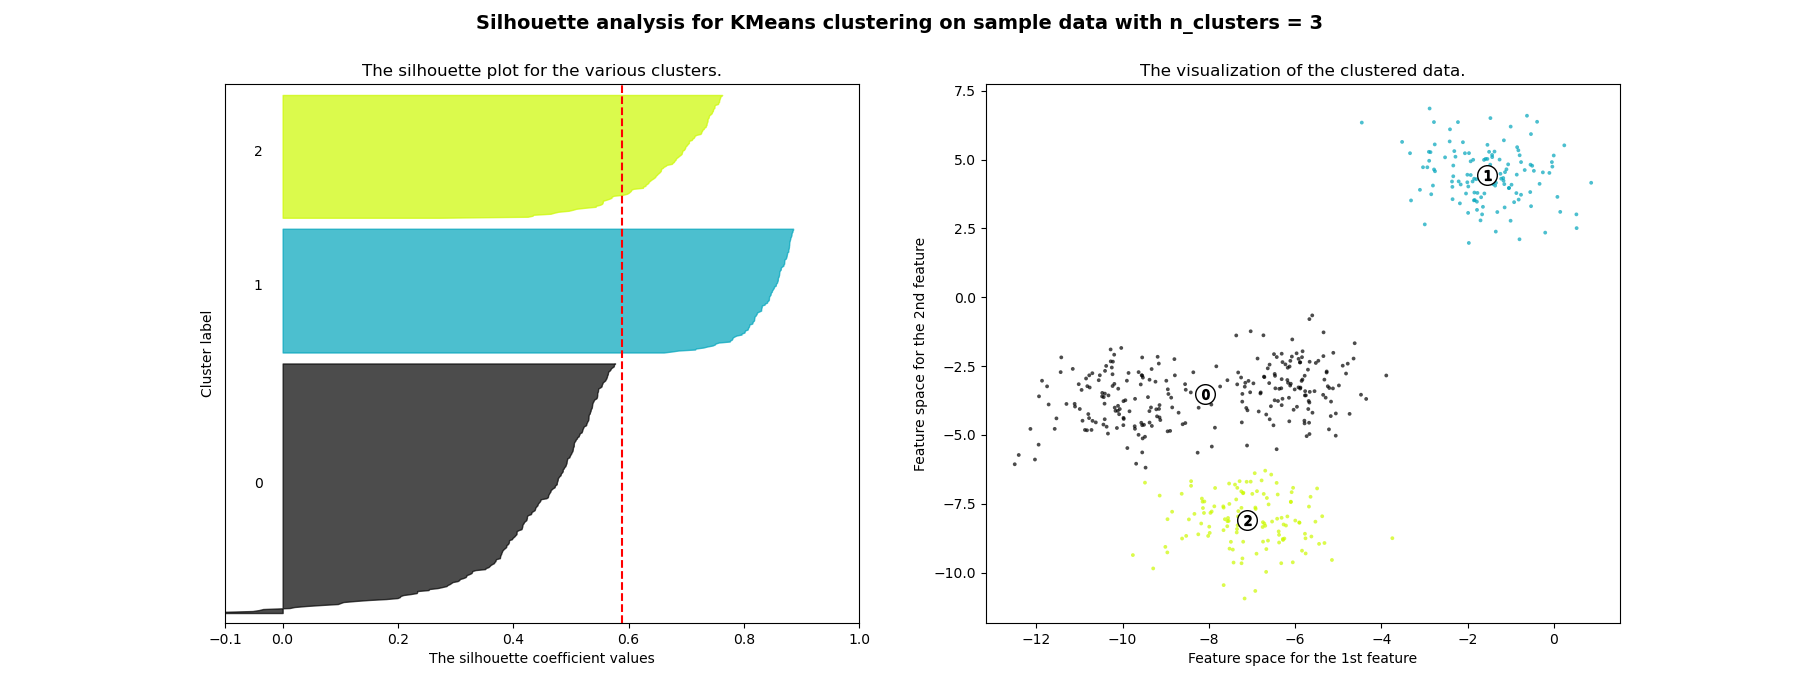
- 다음 그림은 **군집의 개수를 3개**로 정했을 때이다. 이때 전체 데이터의 평균 실루엣 계수, 즉 silhouette_score는 약 **0.588**이다. 
- 왼쪽 그림을 보면 1번 군집과 2번 군집의 경우 평균보다 높은 실루엣 계수 값을 가지고 있지만, 0번의 경우 모두 평균보다 낮다.
- 오른쪽 그림을 보면 0번의 경우 내부 데이터 간의 거리도 멀고, 2번 군집과도 가깝게 위치하고 있기 때문이다.
---
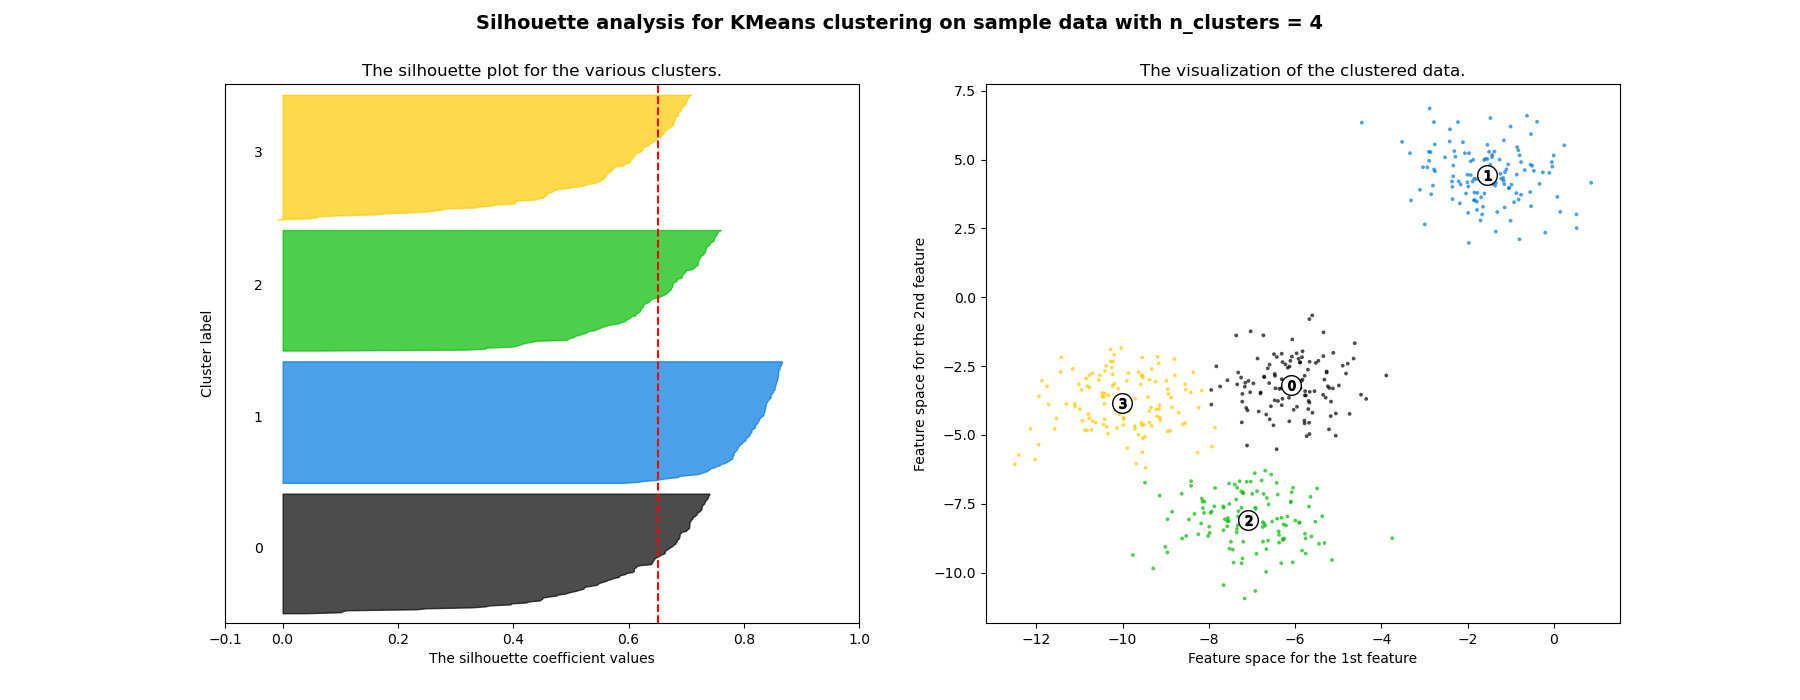
- 다음 그림은 **군집의 개수를 4개**로 정했을 때이다. 이때 전체 데이터의 평균 실루엣 계수, 즉 silhouette_score는 약 **0.65**이다. 
- 왼쪽 그림에서 볼 수 있듯이 개별 군집의 평균 실루엣 계수 값이 비교적 균일하게 위치한다. 
- 1번 군집의 경우 모든 데이터가 평균보다 높은 실루엣 계수 값을 가지고 있으며, 0번과 2번 경우는 절반 이상이 평균보다 높은 실루엣 계수 값을, 3번 군집만 약 1/3 정도가 평균보다 높은 실루엣 계수 값을 가지고 있다.
---
- 이로부터 군집이 2개인 경우보다는 평균 실루엣 계수 값이 작지만 **4개인 경우가 가장 이상적인 군집화 개수**로 판단할 수 있다.



### 3. 평균 이동(Mean Shift)
- **평균 이동**은 K-평균과 유사하게 **중심을 군집의 중심으로 하여 지속적으로 움직이면서 군집화를 수행**한다.
- 하지만 K-평균이 중심에 소속된 데이터의 평균 거리 중심으로 이동하는데 반면, 평균 이동은 **데이터가 모여 있는 밀도가 가장 높은 곳으로 중심을 이동**시킨다.
- 평균 이동 군집화는 **데이터의 분포도를 이용**하여 **군집 중심점**을 찾는다. 
- 군집 중심점은 데이터 포인트가 모여있는 곳이라는 생각에서 착안한 것이며 이를 위해 **확률 밀도 함수**(probability density function)를 이용한다. 가장 집중적으로 데이터가 모여있어 **확률 밀도 함수가 피크인 점을 군집 중심점으로 선정**하며, 일반적으로 주어진 모델의 확률 밀도 함수를 찾기 위해서 **KDE**(Kernel Density Estimation)**을 이용**한다.
- 평균 이동 군집화는 특정 데이터를 반경 내의 데이터 분포 확률 밀도가 가장 높은 곳으로 이동하기 위해 **주변 데이터와의 거리 값을 KDE 함수 값으로 입력**한 뒤 그 **반환 값을 현재 위치에서 업데이트하면서 이동**하는 방식을 취한다. 이러한 방식을 전체 데이터에 반복적으로 적용하면서 데이터의 군집 중심점을 찾아낸다.

### 3. 평균 이동(Mean Shift)
- **KDE**(Kernel Density Estimation)는 커널 함수를 통해 어떤 변수의 확률 밀도 함수를 추정하는 대표적인 방법이다. **관측된 데이터 각각에 커널 함수를 적용한 값을 모두 더한 뒤 데이터 건수로 나눠 확률 밀도 함수를 추정**한다.
- 확률 밀도 함수는 확률 변수의 분포를 나타내는 함수로, 널리 알려진 정규 분포 함수를 포함하여 감마 분포, t-분포 등이 있다. 확률 밀도 함수를 알면 특정 변수가 어떤 값을 갖게 될지에 대한 확률을 알게 되므로 이를 통해 변수의 평균, 분산 등의 특성과 확률 분포 등 많은 요소를 알 수 있다.
- KDE는 개별 관측 데이터에 커널 함수를 적용한 뒤 이 적용 값을 모두 더한 후 개별 관측 데이터의 건수로 나눠 확률 밀도 함수를 추정하며, 이때의 **대표적인 커널 함수**로서 **가우시안 분포 함수**가 사용된다.
- KDE는 다음과 같은 커널 함수식으로 표현된다. K는 커널 함수, $x$는 확률 변수값, $x_i$는 관측값, $h$는 대역폭이다.
- KDE = $\frac{1}{n}\sum_{i=1}^nK_h(x-x_i) = \frac{nh}{1}\sum_{i=1}^nK(\frac{x-x_i}{h})$
- 대역폭 h는 KDE 형태를 부드러운 또는 뾰족한 형태로 평활화(smoothing)하는데 적용되며, 이 h를 어떻게 설정하느냐에 따라 확률 밀도 추정 성능을 크게 좌우할 수 있다.
- **작은 h 값**은 **좁고 뾰족한 KDE**를 갖게 되며 이는 **변동성이 큰 방식으로 확률 밀도 함수를 추정**하므로 **과적합**하기 쉽다. 반대로 **매우 큰 h 값**은 과도하게 평활화된 KDE로 인해 **지나치게 단순화된 방식으로 확률 밀도 함수를 추정**하며 결과적으로 **과소적합**하기 쉽다.



### 3. 평균 이동(Mean Shift)
- 일반적으로 평균 이동 군집화는 **대역폭이 클수록** 평활화된 KDE로 인해 **적은 수의 군집 중심점**을 가지며, **대역폭이 적을수록 많은 수의 군집점**을 가진다. 평균 이동 군집화는 군집의 개수를 지정하지 않으며, 오직 **대역폭의 크기에 따라 군집화를 수행**한다.
- 사이킷런은 평균 이동 군집화를 위해 **`MeanShift`** 클래스를 제공한다. **`sklearn.cluster`**로부터 **`MeanShift`**를 임포트하여 사용한다. 
- **`MeanShift`**의 가장 중요한 초기화 파라미터는 **`bandwidth`**이며, 이 파라미터는 **KDE의 대역폭 h**와 동일하다. 
- **`MeanShift`**를 정의하고, **`fit_predict`** 메서드를 이용하여 군집화를 수행한다.
---
- 다음 예제는 **`make_blobs( )`**의 `cluster_std`를 0.7로 정한 3개 군집의 데이터에 대해 `bandwidth`를 0.8로 설정한 평균 이동 군집화 알고리즘을 적용한 예제이다.
- `bandwidth`를 0.8로 설정하자 군집이 [0, 1, 2, 3, 4, 5]까지 6개로 분류되어 지나치게 세분화되어 군집화되었다.
- 일반적으로 `bandwidth`를 작게 할수록 군집 개수가 많아진다. 이번에는 `bandwidth`를 살짝 높인 1로 하여 평균 이동을 수행한다. 군집이 [0, 1, 2] 3개의 군집으로 잘 군집화되었다.

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

# 군집화용 데이터를 생성
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)

meanshift = MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print("cluster labels 유형:", np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


In [ ]:
meanshift = MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print("cluster labels 유형:", np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


### 3. 평균 이동(Mean Shift)
- 데이터의 분포 유형에 따라 **대역폭 `bandwidth` 값의 변화는 군집화 개수에 큰 영향**을 미칠 수 있다.
- 대역폭 크기 설정이 군집화의 품질에 큰 영향을 미치기 때문에 사이킷런은 **`sklearn.cluster`**로부터 **최적의 대역폭 계산**을 위해 **`estimate_bandwidth( )`** 함수를 제공한다. 
- **`estimate_bandwidth( )`**는 파라미터로 **피처 데이터 세트를 입력**해주면 **최적화된 `bandwidth` 값을 반환**한다.
- `estimate_bandwidth( )`로 측정된 bandwidth를 평균 이동 입력값으로 적용하여 동일한 make_blobs( ) 데이터 세트에 군집화를 수행한다.
- [0, 1, 2] 3개의 군집으로 구성됨을 알 수 있다.
---
- 구성된 3개의 군집을 시각화한다. 
- 평균 이동도 K-평균과 유사하게 **중심을 가지고 있으므로 `cluster_centers_`** 속성으로 **군집 중심 좌표를 표시**할 수 있다.
---
- **`groupby`** 메서드를 이용하여 target 값과 군집 label 값을 비교해보면 1:1로 잘 매칭되었음을 알 수 있다.

In [ ]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print("bandwidth 값:", round(bandwidth, 3))

bandwidth 값: 1.816


In [ ]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1' ,'ftr2'])
clusterDF['target'] = y

# estimate_bandwidth( )로 최적의 bandwidth를 계산
best_bandwidth = estimate_bandwidth(X)

# 평균 이동 군집화 수행
meanshift = MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print("cluster labels 유형:", np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


In [ ]:
clusterDF['meanshift_label'] =cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'x', '*']

clusterDF.head(3)

,ftr1,ftr2,target,meanshift_label
0,-1.671737,3.534007,2,2
1,0.732732,4.413232,0,0
2,1.084733,4.568501,0,0


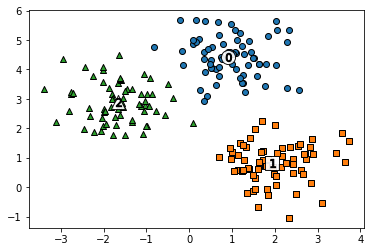

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    # 군집별로 다른 마커로 산점도를 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])
    # 군집별 중심 표현
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$'%label)
plt.show()

In [ ]:
# target 값과 군집 label 값을 비교
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64


### 3. 평균 이동(Mean Shift)
- 평균 이동의 장점은 데이터 세트의 형태를 특정 형태로 가정한다던가, 특정 분포도 기반의 모델로 가정하지 않기 때문에 좀 더 유연한 군집화가 가능하다는 것이다.
- 또한 이상치의 영향력도 크지 않으며, 미리 군집의 개수를 정할 필요도 없다.
- 하지만 알고리즘의 수행 시간이 오래 걸리고, bandwidth의 크기에 따른 군집화 영향도가 매우 크다.
- 이와 같은 특징 때문에 일반적으로 평균 이동 군집화 기법은 분석 업무 기반의 데이터 세트보다는 컴퓨터 비전 영역에서 더 많이 사용된다. 이미지나 영상 데이터에서 특정 개체를 구분하거나 움직임을 추적하는데 뛰어난 역할을 수행하는 알고리즘이다.

### 4. GMM(Gaussian Mixture Model)
- **GMM 군집화**는 군집화를 적용하고자 하는 데이터가 **여러 개의 가우시안 분포를 가진 데이터 집합들이 섞여서 생성된 것이라는 가정하에 군집화를 수행**하는 방식이다.
- 정규 분포로도 알려진 가우시안 분포는 좌우 대칭형의 종 형태를 가진 통계학에서 가장 잘 알려진 연속 확률 함수이다. 
- 정규 분포는 평균 $μ$ 를 중심으로 높은 데이터 분포도를 가지고 있으며, 좌우 표준편차 1에 전체 데이터의 68.27%, 좌우 표준편차 2에 전체 데이터의 95.45%를 가지고 있다. 평균이 0이고, 표준편차가 1인 정규 분포를 표준 정규 분포라고 한다.
---
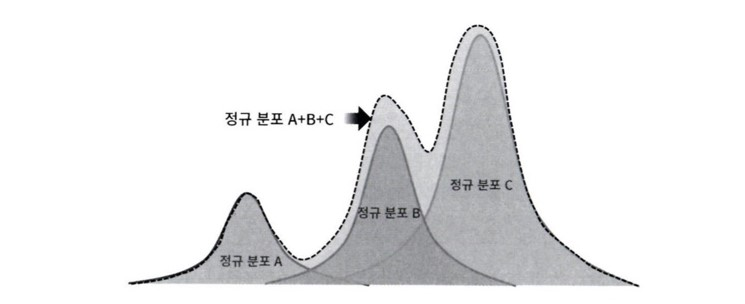
- 3개의 가우시안 분포 A, B, C를 가진 데이터 세트가 있다고 가정한다. 이 3개의 정규 분포를 합치면 다음 형태가 될 것이다.
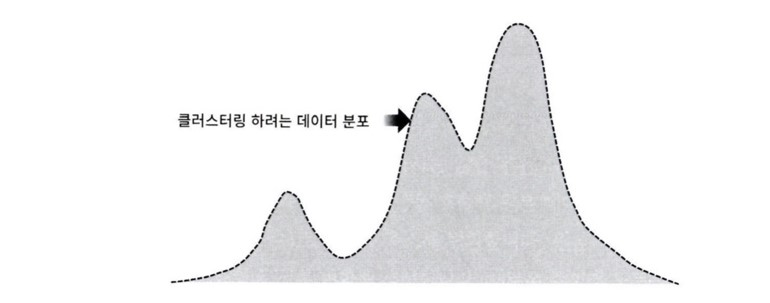
- 군집화를 수행하려는 실제 데이터 세트의 분포도가 다음과 같다면 쉽게 이 데이터 세트가 정규 분포 A, B, C가 합쳐서 된 데이터 분포도임을 알 수 있다.


### 4. GMM(Gaussian Mixture Model)
- 전체 데이터 세트는 **서로 다른 정규 분포 형태를 가진 여러 가지 확률 분포 곡선으로 구성**될 수 있으며, 이러한 서로 다른 정규 분포에 기반하여 군집화를 수행하는 것이 GMM 군집화 방식이다.
- 군집화하려는 데이터 분포로부터 **여러 개의 정규 분포 곡선을 추출**하고, 개별 데이터가 이 중 **어떤 정규 분포에 속하는지 결정**하는 방식이다.
- 이와 같은 방식을 GMM에서는 **모수 추정**이라고 하는데, 모수 추정은 대표적으로 2가지를 추정하는 것이다.
 1. **개별 정규 분포의 평균과 분산**
 2. 각 데이터가 **어떤 정규 분포에 해당되는지의 확률**
- 사이킷런은 이러한 GMM의 EM 방식을 통한 모수 추정 군집화를 지원하며, **`sklearn.mixture`**로부터 **`GaussianMixture`**클래스를 임포트하여 사용한다.

### 4-1. GMM을 이용한 붓꽃 데이터 세트 군집화
- **GMM**은 **확률 기반 군집화**이고, **K-평균**은 **거리 기반 군집화**이다.
- 붓꽃 데이터 세트로 이 두가지 방식을 이용하여 군집화를 수행한 뒤 양쪽 방식을 비교한다.
--- 
- GMM 군집화를 수행하기 위해 **`GaussianMixture`**를 사용한다. 
- 가장 중요한 초기화 파라미터는 **`n_components`**로, gaussian mixture의 **총 모델 개수**를 결정한다. K-평균의 n_clusters와 같이 군집의 개수를 정하는 역할이다.
- 클래스를 선언하고 **`fit(피처 데이터 세트)`**와 **`predict(피처 데이터 세트)`**를 수행하여 군집을 결정한다.
- 결정한 군집을 irisDF의 'gmm_cluster' 칼럼으로 저장하고, **`groupby`** 메서드를 이용하여 타겟별로 군집이 어떻게 매핑되었는지 확인한다.
- target 0은 cluster 0으로, target 2는 cluster 1로 모두 잘 매핑되었으나 target 1만 cluster 2로 45개(90%), cluster 1로 5개(10%) 매핑되었다.
--- 
- K-평균 군집화를 수행한 결과를 보면 GMM 군집화가 더 효과적인 분류 결과를 도출했다는 것을 알 수 있다.
- 이는 어떤 알고리즘에 더 뛰어나다는 의미가 아니라, 붓꽃 데이터 세트가 GMM 군집화에 더 효과적이라는 의미이다.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

# GMM 군집화
# 결과를 irisDF의 'gmm_cluster' 칼럼으로 저장
irisDF['gmm_cluster'] = gmm_cluster_labels

# target 값에 따라 gmm_cluster 값이 어떻게 매핑되었는지 확인
iris_result = irisDF.groupby('target')['gmm_cluster'].value_counts()
iris_result

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64


In [ ]:
# K-평균 군집화
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
irisDF['kmeans_cluster'] = kmeans_cluster_labels

# target 값에 따라 gmm_cluster 값이 어떻게 매핑되었는지 확인
iris_result = irisDF.groupby('target')['kmeans_cluster'].value_counts()
iris_result

target  kmeans_cluster
0       1                 50
1       0                 48
        2                  2
2       2                 36
        0                 14
Name: kmeans_cluster, dtype: int64

### 4-2. GMM과 K-평균의 비교
- K-평균 군집화는 원형의 범위에서 군집화를 수행하므로,  **데이터 세트가 원형의 범위**를 가질수록 **군집화 효율이 더욱 높아진다**.
- **`make_blobs( )`**의 군집의 수를 3개로 하되, `cluster_std`를 0.5로 설정하여 군집 내의 데이터를 뭉치게 유도한 데이터 세트에 KMeans를 적용한다. 이렇게 **`cluster_std`를 작게 설정**하면 **데이터가 원형 형태로 분산**된다.
- 결과를 보면 KMeans로 효과적인 군집화가 이루어졌음을 알 수 있다.
--- 
- 앞으로 군집을 자주 시각화하므로 이를 위한 별도의 함수 **visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True)**를 생성한다.
 - clusterobj : 사이킷런의 군집화 수행 객체로, KMeans나 GaussianMixture의 fit()와 predict()로 군집화를 완료한 객체이다. make_blobs()로 생성한 데이터의 시각화일 경우에는 None을 입력한다.
 - dataframe : 피처 데이터 세트와 label 값을 가진 DataFrame
 - label_name : 군집화 결과 시각화일 경우 DataFrame 내의 군집화 label 칼럼 명, make_blobs() 결과 시각화일 경우 DataFrame 내의 군집화 target 칼럼 명을 입력한다.
 - iscenter : 사이킷런 cluster 객체가 군집 중심 좌표를 제공하면 True, 제공하지 않으면 False이다.

In [ ]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

### 4-2. GMM과 K-평균의 비교
- 반면 데이터가 원형의 범위가 퍼져있지 않은 경우에는 K-평균 군집화를 효율적으로 수행하지 못한다. K-평균 군집화는 대표적으로 **데이터가 길쭉한 타원형**으로 늘어선 경우에 **군집화를 잘 수행하지 못한다**. 
- **`make_blobs( )`**로 생성한 데이터를 임의로 길게 늘어난 타원형의 데이터 세트로 변환하기 위해 변형 상수를 정해 내적한다.
- 원형이 아닌 길쭉한 타원형 데이터에 대해 K-평균 군집화를 수행한 결과를 확인한다.
- 결과를 확인해보면 앞선 군집화 결과보다 덜 효율적임을 알 수 있다.
- K-평균 균집화는 평균 거리를 기반으로 군집화를 수행하므로 같은 거리상 원형으로 군집을 구성하기 때문에, 길쭉한 방향으로 데이터가 밀접해 있을 경우에는 최적의 군집화가 어렵다.

In [ ]:
# 군집화용 데이터 생성
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

# K-평균 군집화
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(X)
kmeans_cluster_X = kmeans.predict(X)
dt = pd.DataFrame(y, columns=['y'])
dt['kmean_X'] = kmeans_cluster_X
dt.groupby('y')['kmean_X'].value_counts()

y  kmean_X
0  2          100
1  1          100
2  0          100
Name: kmean_X, dtype: int64

### 4-2. GMM과 K-평균의 비교
- 반면 데이터가 원형의 범위가 퍼져있지 않은 경우에는 K-평균 군집화를 효율적으로 수행하지 못한다. K-평균 군집화는 대표적으로 **데이터가 길쭉한 타원형**으로 늘어선 경우에 **군집화를 잘 수행하지 못한다**. 
- **`make_blobs( )`**로 생성한 데이터를 임의로 길게 늘어난 타원형의 데이터 세트로 변환하기 위해 변형 상수를 정해 내적한다.
- 원형이 아닌 길쭉한 타원형 데이터에 대해 K-평균 군집화를 수행한 결과를 확인한다.
- 결과를 확인해보면 앞선 군집화 결과보다 덜 효율적임을 알 수 있다.
- K-평균 균집화는 평균 거리를 기반으로 군집화를 수행하므로 같은 거리상 원형으로 군집을 구성하기 때문에, 길쭉한 방향으로 데이터가 밀접해 있을 경우에는 최적의 군집화가 어렵다.

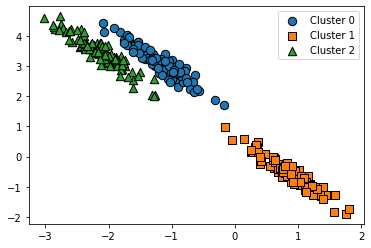

In [ ]:
X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

# 길게 늘어난 타원형의 데이터 세트를 생성하기 위한 변환
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

# 내적하여 변환한 feature 데이터 세트와 make_blobs()의 y 결과값을 DataFrame으로 저장
clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

# make_blobs()로 생성된 데이터 세트를 target 별로 다른 마커로 표시하여 시각화
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

### 4-2. GMM과 K-평균의 비교
- 이번에는 같은 데이터에 대해 GMM으로 군집화를 수행하고, 시각화한다.
- GMM 군집화의 경우 데이터가 분포된 방향에 따라 정확하게 군집화되었음을 알 수 있다.
- K-평균 군집화 결과와 GMM 군집화 결과를 한 눈에 비교하면 다음과 같다.
- 이처럼 **GMM 군집화**의 경우 K-평균 군집화보다 **유연하게 다양한 데이터 세트에 잘 적용될 수 있다**는 장점이 있으나, **군집화를 위한 수행 시간이 오래 걸린다**는 단점이 있다.

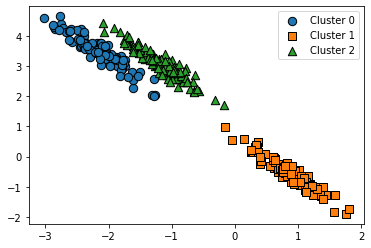

In [ ]:
# GMM 군집화
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label'] = gmm_label

# GMM 군집화 결과 시각화, cluster_centers_ 속성이 없으므로 iscluster는 False
visualize_cluster_plot(gmm, clusterDF, 'gmm_label', iscenter=False)

In [ ]:
print("### KMeans Clustering ###")
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print("\n### Gaussian Mixture Clustering ###")
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: kmeans_label, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64


### 5. DBSCAN
- **DBSCAN**(Density Based Spatial Clustering of Applications with Noise)은 **밀도 기반 군집화**의 대표적인 알고리즘이다.
- DBSCAN은 특정 공간 내에 데이터 밀도 차이를 기반으로 하는 알고리즘으로 하고 있어서, **복잡한 기하학적 분포도를 가진 데이터** 세트에 대해서도 **효과적인 군집화가 가능**하다.
- DBSCAN을 구성하는 가장 중요한 두가지 파라미터는 입실론(epsilon)으로 표기하는 주변 영역과 이 입실론 주변 영역에 포함되는 최소 데이터의 개수인 min points이다.
 - **입실론 주변 영역(epsilon)** : 개별 데이터를 중심으로 입실론 반경을 가지는 **원형의 영역**
 - **최소 데이터 개수(min points)** : 개별 데이터의 입실론 **주변 영역에 포함되는 타 데이터의 개수**
- 입실론 주변 영역 내에 포함되는 최소 데이터의 개수를 충족시키는가 아닌가에 따라 데이터 포인트를 다음과 같이 정의한다.
 - **핵심 포인트(Core Point)** :  **주변 영역 내에 최소 데이터 개수 이상**의 타 데이터를 가지고 있을 경우 해당 데이터이다.
 - **이웃 포인트(Neighbor Point)** : **주변 영역 내에 위치한 타 데이터**이다.
 - **경계 포인트(Border Point)** :  주변 영역 내에 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않지만, **핵심 포인트를 이웃 포인트로 가지고 있는 데이터**이다.
 - **잡음 포인트(Noise Point)** : 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않으며, 핵심 포인트도 이웃 포인트로 가지고 있지 않는 데이터이다.
- DBSCAN은 입실론 **주변 영역의 최소 데이터 개수를 포함하는 밀도 기준을 충족**시키는 데이터인 **핵심 포인트를 연결하면서 군집화를 구성**하는 방식이다.
---
- 사이킷런은 DBSCAN을 위한 클래스를 지원하며, **`sklearn.cluster`**로부터 **`DBSCAN`** 클래스를 임포트하여 사용한다. 주요한 초기화 파라미터는 **`eps`**와 **`min_samples`**이다.
 - **`eps`** : **입실론 주변 영역의 반경**을 의미한다.
 - **`min_samples`** : 핵심 포인트가 되기 위해 **입실론 주변 영역 내에 포함되어야 할 데이터의 최소 개수**를 의미한다. 자신을 포함한 값으로, **min points + 1**이다.

### 5-1. DBSCAN 적용하기 - 붓꽃 데이터 세트
- DBSCAN 알고리즘으로 붓꽃 데이터 세트의 군집화를 수행한다.
- DBSCAN 클래스의 eps=0.6, min_samples=8로 설정한다. 일반적으로 e**ps로 1 이하의 값을 설정**한다.
- 정의한 클래스에 **`fit_transform( )`**를 이용하여 군집화를 수행하고, `groupby( )` 메서드를 이용하여 군집화 결과를 확인한다.
- dbscan_cluster의 값을 살펴보면 0과 1 외에 특이하게 -1이 군집 레이블로 있는 것을 알 수 있다. **군집 레이블이 -1인 것은 노이즈에 속하는 군집을 의미**하므로, 붓꽃 데이터 세트는 DBSCAN 군집화를 통해 0과 1 두개의 군집으로 군집화되었으며, 13개의 노이즈를 갖는다.
- target 값의 유형이 3가지인데 군집이 2개가 되었다고 해서 군집화 효율이 떨어진다는 의미는 아니다. 
---
- 특히 붓꽃 데이터 세트는 군집을 3개로 하는 것보다 2개로 하는 것이 군집화의 효율로서 더 좋은 면이 있다.
- DBSCAN으로 군집화 데이터 세트를 2차원 평면에 표현하기 위해 PCA를 이용하여 2개의 피처로 압축 변환한뒤, visualize_cluster_plot() 함수를 이용하여 시각화한다.
함수의 인자로 사용하기 위해 irisDF의 'ftr1', 'ftr2', 칼럼에 PCA로 변환된 데이터 세트를 입력한다.
- 별표로 표현된 값은 모두 노이즈이다. PCA를 이용하여 2차원으로 표현하면 이상치인 노이즈 데이터가 명확하게 드러난다.

In [ ]:
iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

# DBSCAN 군집화
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
iris_result = irisDF.groupby('target')['dbscan_cluster'].value_counts()
iris_result   # 노이즈 개수 13개

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64

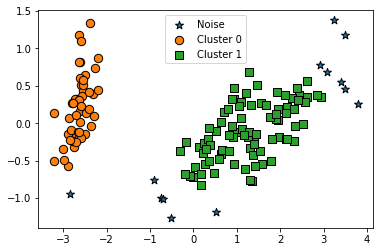

In [ ]:
# 2차원으로 시각화하기 위해 2개의 주성분을 갖는 PCA로 피처 데이터 세트 변환
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)

# visualize_cluster_plot() 함수는 ftr1, ftr2 칼럼을 좌표에 표현하므로 PCA 변환값을 해당 칼럼으로 생성
irisDF['ftr1'] = pca_transformed[:, 0]
irisDF['ftr2'] = pca_transformed[:, 1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

### 5-1. DBSCAN 적용하기 - 붓꽃 데이터 세트
- DBSCAN은 **군집의 개수를 알고리즘에 따라 자동으로 지정**하므로, DBSCAN을 적용할 때는 특정 군집 개수로 군집을 강제하지 않는 것이 좋다.
- 적절한 **eps와 min_samples** 파라미터를 통해 최적의 군집을 찾는 것이 중요하다.  
 - 일반적으로 **eps의 값을 크게 하면** 반경이 커져 포함하는 데이터가 많아지므로 **노이즈 데이터 개수가 감소한다**. 
 - eps를 기존의 0.6에서 0.8로 증가시키면 노이즈 데이터 수가 감소한다. 군집화를 수행하여 결과를 확인하면 노이즈 군집인 -1이 3개밖에 없다.
 ---
 - **min_samples를 크게 하면** 반경 내에서 더 많은 데이터를 포함시켜야 하므로 **노이즈 데이터의 개수가 증가한다**. 데이터 밀도가 더 커져야 하는데, 매우 촘촘한 데이터 분포가 아닌 노이즈로 인식하기 때문이다.
 - min_samples를 기존의 8에서 16으로 증가시키면 노이즈 데이터 수가 증가한다. 군집화를 수행하여 결과를 확인하면 노이즈 군집인 -1이 22개 존재한다.

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


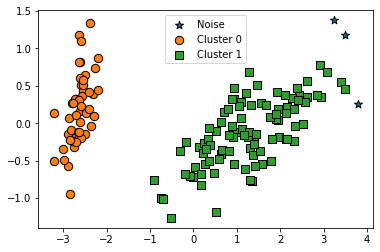

In [ ]:
# eps를 0.6에서 0.8로 증가시킴
dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
iris_result = irisDF.groupby('target')['dbscan_cluster'].value_counts()
print(iris_result)   # 노이즈 개수 3개

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64


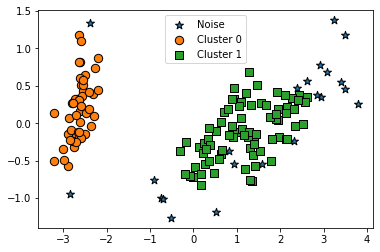

In [ ]:
# min_samples를 8에서 16으로 증가시킴
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
iris_result = irisDF.groupby('target')['dbscan_cluster'].value_counts()
print(iris_result)   # 노이즈 개수 22개

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

### 5-2. DBSCAN 적용하기 - make_circles( ) 데이터 세트
- 복잡한 기하학적 분포를 가진 데이터 세트에서 DBSCAN과 타 알고리즘을 비교한다.
- 먼저 **`make_circles( )`**을 이용하여 **내부 원과 외부 원의 형태로 되어있는 2차원 데이터 세트를 생성**한다.
- **`make_circles( )`** 함수는 오직 **2개의 피처만을 생성**하므로 별도의 피처 개수를 지정할 필요가 없다. 파라미터 **`noise`**는 노이즈 데이터 세트의 비율이며, **`factor`**는 내부 원과 외부 원의 scale 비율이다.

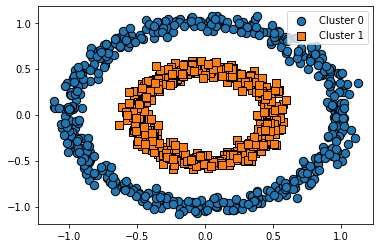

In [ ]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, factor=0.5, random_state=0)
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

### 5-2. DBSCAN 적용하기 - make_circles( ) 데이터 세트
- 이렇게 내부 원과 외부 원으로 구분되는 데이터 세트를 생성하고, **K-평균, GMM, DBSCAN**이 각각 어떻게 이 데이터 세트를 군집화하는지 결과를 확인한다.
- **K-평균 군집화** 결과, 위와 아래 군집 중심을 기반으로 절반씩 군집화되었다. 거리 기반 군집화인 K-평균으로는 위와 같이 데이터가 특정한 형태로 지속해서 이어지는 부부늘 찾아내기 어렵다.
- **GMM 군집화** 결과, 비슷한 결과가 나타난다. 앞에서처럼 일렬로 늘어선 데이터 세트에서는 효과적으로 군집화 적용이 가능했으나, 내부와 외부의 원형으로 구성된 더 복잡한 형태의 데이터 세트에서는 원하는 방향으로 군집화되지 않았다.
- **DBSCAN 군집화** 결과,  내부 원과 외부 원으로 정확히 나누어져 원하는 방향으로 군집화 되었음을 알 수 있다.

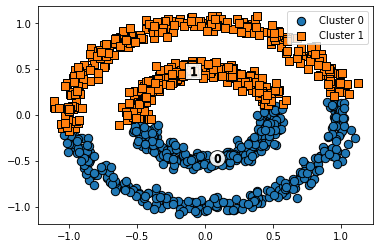

In [ ]:
# K-평균 군집화
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_label = kmeans.fit_predict(X)
clusterDF['kmeans_cluster'] = kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)

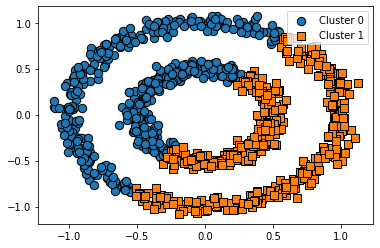

In [ ]:
# GMM 군집화
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm.fit_predict(X)
clusterDF['gmm_cluster'] = gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)

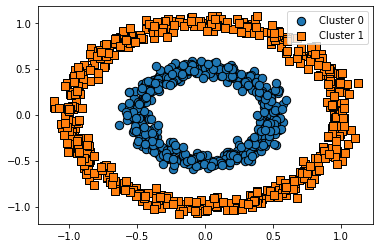

In [ ]:
# DBSCAN 군집화
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_label = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_label

visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)